[ 3.5244171  -1.94500603 -2.67284371 -2.3456822  -2.54862688 -0.22263806
 -0.11885379]


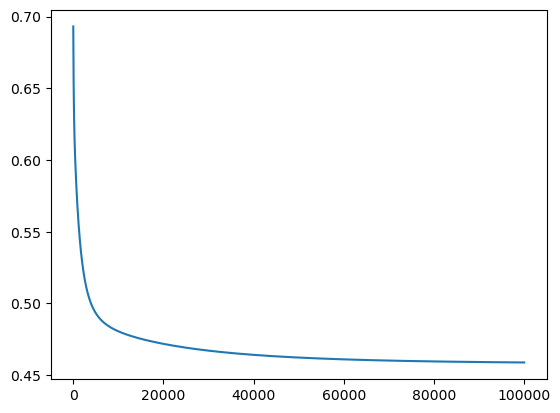

80.96774193548387


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_train  = pd.read_csv('train-2.csv')
data_train.head()

y = data_train.iloc[:,0].values

#data scaling
#data_train=(data_train-data_train.mean())/data_train.std()

x = data_train.iloc[:,1:8].values
#print(type(x))
#print(x)
#print(y)

x[x=='male'] = 1
x[x=='female']=0

x = np.delete(x,1,axis=1)

#print(np.shape(x))

x

x = (x - x.min(axis=0))  / ((x.max(axis=0) - x.min(axis=0)))

x.max(axis=0)

(m,n) = x.shape
n = n+1
temp_train = np.ones(shape = (m,n))
temp_train[:,1:8] = x
x = temp_train

def sigmoid(x):
    sig=1/(1+np.exp(-x))
    return sig
 
def Logistic_regression(x,y,alpha,epoch):
    theta=np.zeros(7)
    cost_list=[]
    
    for i in range(epoch):
        k=(np.dot(x,theta))
        cost= -(1/len(x))*np.sum(y*np.log(sigmoid(k)) + (1-y)*np.log(1-sigmoid(k)))
        cost_list.append(cost)
        theta=theta - (1/len(x)) * alpha * np.dot(x.T, sigmoid(k) - y)
        
    return theta,cost_list



epoch = 100000
alpha = 0.01

theta, cost_list = Logistic_regression(x,y,alpha,epoch)
print(theta)
#print(cost_list)


plt.plot(range(epoch),cost_list)
plt.show()
#plt.plot(range(epoch), cost_list)
#plt.show

data_test  = pd.read_csv('test-2.csv')

data_test.head()

y_test = data_test.iloc[:,0].values

x_test = data_test.iloc[:,1:8].values


x_test[x_test=='male'] = 1
x_test[x_test=='female']=0

x_test = np.delete(x_test,1,axis=1)

x_test = (x_test-x_test.min(axis=0))/((x_test.max(axis=0)-x_test.min(axis=0)))

(m,n) = x_test.shape
n = n+1

temp_test = np.ones(shape=(m,n))
temp_test[:,1:8] = x_test
x_test = temp_test
#print(x_test)


y_final = sigmoid(np.dot(x_test,theta))

for i in range(len(y_final)):
    if(y_final[i]>0.5):
        y_final[i]=1
    else:
        y_final[i]=0
 

t=0
for i in range(len(y_final)):
    if(y_final[i]==y_test[i]):
        t = t+1


accuracy = t/len(y_test)*100

print(accuracy)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_train  = pd.read_csv('train-2.csv')
data_train.head()
classifier =Logistic_Regression(learning_rate=0.01, no_of_iterations=1000)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
